In [1]:
import numpy as np

from sklearn.datasets import load_iris

import matplotlib.pyplot as plt

%matplotlib inline

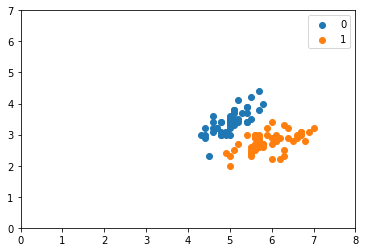

In [221]:
iris = load_iris()

data = iris.data

target = iris.target

X = data[:100, [0, 1, 2]]

y = target[:100]

label = np.array(y)

index_0 = np.where(label==0)

plt.scatter(X[index_0, 0], X[index_0, 1], label='0')

index_1 = np.where(label==1)

plt.scatter(X[index_1, 0], X[index_1, 1], label='1')

plt.xlim(0, 8)

plt.ylim(0, 7)

plt.legend()

plt.show()



In [148]:
class Logistic(object):

    def __init__(self):

        self.W = None

    

    def train(self, X, y, learn_rate=0.001, iter_num=10200):

        train_num, train_feature = X.shape

        self.W = 0.001*np.ones((train_feature, 1))

        loss = []

        

        for i in range(iter_num):

            error, dW = self.compute_loss(X, y)

            self.W += -learn_rate*dW

            loss.append(error)

            if i % 500==0:

                print('i:%d error: %f' %(i, error))

        return loss

                    

    

    def compute_loss(self, X, y):

        train_num = X.shape[0]

        h = self.sigmoid(np.dot(X, self.W))

        loss = -np.sum((y*np.log(h) + (1-y)*np.log((1-h))))

        loss = loss/train_num

        dW = X.T.dot((h-y)) / train_num

        

        return loss, dW

        

    def sigmoid(self, X):

        return 1.0 / (1+np.exp(-X))

    

    def predict(self, X):

        h = self.sigmoid(np.dot(X, self.W))

        pre = np.where(h>=0.5, 1, 0)

        return pre

In [230]:

def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))

def input_net(x, theta):
    return np.dot(x, theta)

# 概率函数
def probability(x, theta):
    return sigmoid(input_net(x, theta))

# 损失函数
def cost_function(x, y, theta):
    m = x.shape[0]
    h = probability(x, theta)
    loss = -np.sum(y*np.log(h) + (1-y)*np.log(1 - h))
    loss = loss/m
    #dW = x.T.dot(h-y)
    #dW = dW/m
    return loss

# 梯度函数
def gradient(x, y, theta):
    m = x.shape[0]
    h = probability(x, theta)
    # 预测概率减去真实概率
    dW = x.T.dot(h-y)
    dW = dW/m
    return dW

#梯度下降 训练
def fit(x, y, alpha, iter_num):
    loss = []
    m, n = x.shape
    theta = np.ones((n, 1))
    for i in range(iter_num):
        error = cost_function(x, y, theta)
        loss.append(error)
        dW = gradient(x, y, theta)
        # 更新权重参数
        theta = theta + (-alpha * dW)
    return theta, loss

# 预测
def predict_(x, theta):
    return probability(x, theta)

# 模型准确性
def accuracy(x, accual_classes, theta, probab_threshold=0.9):
    predict_classes = (predict_(x, theta) >= probab_threshold).astype(int)
    predict_classes = predict_classes.flatten()
    accuracy = np.mean(predict_classes == accual_classes)
    return accuracy * 100


In [212]:

m, n = X.shape
yy = target[:100].reshape(-1, 1)
theta = np.ones((n, 1))
w, loss = fit(X, yy, 0.001, 6000)

type(gradient(X, yy, theta))
w

array([[-0.49420499],
       [-0.57020689],
       [ 1.6131343 ]])

# 决策边界

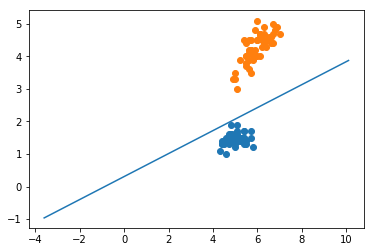

In [224]:
x_ = [np.min(X[: 1] - 5), np.max(X[: 2] + 5)]
y_ = -(w[0] + w[1]*x_)/w[2]
plt.scatter(X[index_0, 0], X[index_0, 2])
plt.scatter(X[index_1, 0], X[index_1, 2])
plt.plot(x_, y_)

# 误差梯度

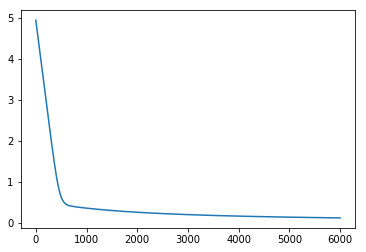

In [211]:
plt.plot(loss)

# 模型准确度

In [226]:
accuracy(X, y.flatten(), w)

82.0

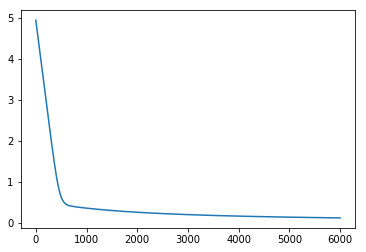

In [228]:
plt.plot(loss)